#Pandas Express 
###An express guide to becoming a Kung Fu Pandas master

<img src="http://vignette1.wikia.nocookie.net/kungfupanda/images/8/88/Po2.jpg/revision/latest?cb=20100726062228" width="300"/>

###The Tools
This tutorial will walk you through doing some basic data cleaning and exploratory analysis with Pandas and a suite of other Python data analysis tools. Below are a few of the tools we will be using:

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting
* [seaborn](http://stanford.edu/~mwaskom/software/seaborn/), for making plots pretty

In [4]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# iPython command to format matplotlib plots
%matplotlib inline 

If you have trouble importing any of the packages, you might need to install it first from the website or, if you're on Mac OS or ubuntu, from the console with: `pip install <name of package>`

###The Dataset
We will be using a dataset of Yelp reviews provided by the [Yelp Dataset Challenge](http://www.yelp.com/dataset_challenge). The download consists of the following files in JSON format:
* business.json - information on businesses
* review.json - text and metadata of reviews
* tip.json - text and metadata of tips
* user.json - information on users
* checkin.json - number of checkins at each business

In this tutorial, we will be primarily focused on the business.json file

###Loading in and cleaning the data
The Yelp dataset is in JSON format, [which you can read about here](https://en.wikipedia.org/wiki/JSON) if you are at all interested. Luckily, Python (and most other programming languages) have packages for parsing and reading JSON file formats. In this case, we are going to use Python's JSON file reader to read in the file and then convert it to a Pandas DataFrame. (Note: Pandas also has a `read_json` function that reads in a JSON file, but in this case, we had to do a little cleanup to remove trailing whitespace at the end of each line)

####Load in data

In [5]:
import json

'''
load_json(filepath) 
Given a filepath to a JSON file, loads in the file and formats the JSON
'''
def load_json(filepath):
    data = []
    with open(filepath) as file:
        for line in file:
            # Strip out trailing whitespace at the end of the line
            data.append(json.loads(line.rstrip()))
    return data

In [6]:
data = load_json('data/business.json')

In [7]:
data[0]

{u'attributes': {u'By Appointment Only': True},
 u'business_id': u'vcNAWiLM4dR7D2nwwJ7nCA',
 u'categories': [u'Doctors', u'Health & Medical'],
 u'city': u'Phoenix',
 u'full_address': u'4840 E Indian School Rd\nSte 101\nPhoenix, AZ 85018',
 u'hours': {u'Friday': {u'close': u'17:00', u'open': u'08:00'},
  u'Monday': {u'close': u'17:00', u'open': u'08:00'},
  u'Thursday': {u'close': u'17:00', u'open': u'08:00'},
  u'Tuesday': {u'close': u'17:00', u'open': u'08:00'},
  u'Wednesday': {u'close': u'17:00', u'open': u'08:00'}},
 u'latitude': 33.499313,
 u'longitude': -111.983758,
 u'name': u'Eric Goldberg, MD',
 u'neighborhoods': [],
 u'open': True,
 u'review_count': 9,
 u'stars': 3.5,
 u'state': u'AZ',
 u'type': u'business'}

In [8]:
'''
from_dict()
Construct a DataFrame from dict of array-like or dicts
'''
business_df = pd.DataFrame.from_dict(data)

####Basic exploration
Let's take a look at what's inside! The [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#dataframe) has a full list of functions, but below are some helpful ones for doing some initial poking around. 

In [9]:
'''
head(n) 
Print out the first n rows of a Pandas DataFrame
'''
business_df.head(5)

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,{u'By Appointment Only': True},vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]",Phoenix,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{u'Thursday': {u'close': u'17:00', u'open': u'...",33.499313,-111.983758,"Eric Goldberg, MD",[],True,9,3.5,AZ,business
1,"{u'Happy Hour': True, u'Accepts Credit Cards':...",UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350519,-79.886930,Clancy's Pub,[],True,4,3.5,PA,business
2,{u'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.356896,-80.015910,Cool Springs Golf Center,[],False,5,2.5,PA,business
3,{},HZdLhv6COCleJMo7nPl-RA,"[Shopping, Home Services, Internet Service Pro...",Pittsburgh,"301 S Hills Vlg\nPittsburgh, PA 15241","{u'Monday': {u'close': u'21:00', u'open': u'10...",40.357620,-80.059980,Verizon Wireless,[],True,3,3.5,PA,business
4,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",Braddock,"414 Hawkins Ave\nBraddock, PA 15104","{u'Tuesday': {u'close': u'19:00', u'open': u'1...",40.408735,-79.866351,Emil's Lounge,[],True,11,4.5,PA,business


In [10]:
'''
describe()
Generate various summary statistics, excluding NaN values
'''
business_df.describe()

,latitude,longitude,open,review_count,stars
count,61184.000000,61184.000000,61184,61184.000000,61184.000000
mean,37.326077,-97.491803,0.878089,28.272506,3.673305
std,5.741085,29.624473,0.3271856,88.652050,0.891207
min,32.871923,-115.386550,False,3.000000,1.000000
25%,33.509601,-115.052224,1,4.000000,3.000000
50%,35.994636,-111.932944,1,8.000000,3.500000
75%,36.240430,-80.863329,1,21.000000,4.500000
max,56.036545,8.549249,True,4578.000000,5.000000


In [12]:
'''
dtypes
Attribute that returns the datatypes of the object
'''
business_df.dtypes

attributes        object
business_id       object
categories        object
city              object
full_address      object
hours             object
latitude         float64
longitude        float64
name              object
neighborhoods     object
open                bool
review_count       int64
stars            float64
state             object
type              object
dtype: object

In [81]:
'''
shape
Attribute of a DataFrame as (rows, columns)
'''
business_df.shape

(61184, 15)

Some of the most commonly used operations on Dataframes are various types of indexing, filtering, and slicing. Pandas has a number of different ways to do these operations ([check out this whole page of documentation about it](http://pandas.pydata.org/pandas-docs/stable/indexing.html)), but below are a few examples.

In [118]:
# Select a column (returns a Series)
business_df['name']

0                                    Eric Goldberg, MD
1                                         Clancy's Pub
2                             Cool Springs Golf Center
3                                     Verizon Wireless
4                                        Emil's Lounge
5                                Alexion's Bar & Grill
6                      Flynn's E W Tire Service Center
7                     Forsythe Miniature Golf & Snacks
8                            Quaker State Construction
9                              Kings Family Restaurant
10                                         Shop N'save
11                                      Rocky's Lounge
12                                           Gab & Eat
13                        Barb's Country Junction Cafe
14       Extended Stay America - Pittsburgh - Carnegie
15                                  Paddy's Pour House
16                          Porto Fino Pizzaria & Gyro
17                                    Alteration World
18        

In [104]:
# Select multiple columns (returns a DataFrame)
business_df[['business_id', 'name']]

,business_id,name
0,vcNAWiLM4dR7D2nwwJ7nCA,"Eric Goldberg, MD"
1,UsFtqoBl7naz8AVUBZMjQQ,Clancy's Pub
2,cE27W9VPgO88Qxe4ol6y_g,Cool Springs Golf Center
3,HZdLhv6COCleJMo7nPl-RA,Verizon Wireless
4,mVHrayjG3uZ_RLHkLj-AMg,Emil's Lounge
5,KayYbHCt-RkbGcPdGOThNg,Alexion's Bar & Grill
6,b12U9TFESStdy7CsTtcOeg,Flynn's E W Tire Service Center
7,Sktj1eHQFuVa-M4bgnEh8g,Forsythe Miniature Golf & Snacks
8,3ZVKmuK2l7uXPE6lXY4Dbg,Quaker State Construction
9,wJr6kSA5dchdgOdwH6dZ2w,Kings Family Restaurant


In [102]:
# Filter a column on a value
business_df[business_df['name'] == 'Panda Express']

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,...,Windows Installation,Windshield Installation & Repair,Wine Bars,Wine Tours,Wineries,Wok,Women's Clothing,Yelp Events,Yoga,Zoos
1816,"{u'Take-out': True, u'Accepts Credit Cards': T...",kMcbuXZx3iILJVEPyLgPpQ,"[Chinese, Restaurants]",Champaign,"2000 N Neil St\nChampaign, IL 61820",{},40.139918,-88.244639,Panda Express,[],...,0,0,0,0,0,0,0,0,0,0
2613,"{u'Take-out': True, u'Price Range': 1, u'Outdo...",nLpV9fo8xml-QHOKyOje2A,"[Chinese, Restaurants]",Phoenix,"3923 E Thomas Rd\nPhoenix, AZ 85018",{},33.479870,-111.997824,Panda Express,[],...,0,0,0,0,0,0,0,0,0,0
2778,"{u'Take-out': True, u'Accepts Credit Cards': T...",wLZ--5d4lXImxrG7VhdTyA,"[Chinese, Restaurants]",Phoenix,"7000 N 16th St\nSte 100\nPhoenix, AZ 85020",{},33.538927,-112.048079,Panda Express,[],...,0,0,0,0,0,0,0,0,0,0
2994,"{u'Take-out': True, u'Price Range': 1, u'Outdo...",VTFx4ADDP6nPnlcMHB1-Ow,"[Chinese, Restaurants]",Phoenix,"903 E Bell Rd\nSte 101\nPhoenix, AZ 85022",{},33.640255,-112.061145,Panda Express,[],...,0,0,0,0,0,0,0,0,0,0
3053,"{u'Take-out': True, u'Price Range': 1, u'Outdo...",bexPpkHMthuCaeC0g0Lrfg,"[Chinese, Restaurants]",Phoenix,"10637 N Tatum Blvd\nPhoenix, AZ 85028","{u'Monday': {u'close': u'21:00', u'open': u'10...",33.584266,-111.976787,Panda Express,[],...,0,0,0,0,0,0,0,0,0,0
3282,"{u'Take-out': True, u'Price Range': 2, u'Outdo...",rEC1QrZVEYH8LpowJ_DNZA,[Restaurants],Phoenix,"3932 E Thunderbird Rd\nSuite 111\nPhoenix, AZ ...",{},33.611868,-111.996439,Panda Express,[],...,0,0,0,0,0,0,0,0,0,0
3770,"{u'Take-out': True, u'Price Range': 1, u'Outdo...",4DDbIvNtzfhLRwz-EOLFDA,"[Food, Desserts, Asian Fusion, Chinese, Restau...",Phoenix,"21001 N Tatum Blvd\nSte 1630\nPhoenix, AZ 85050","{u'Monday': {u'close': u'22:30', u'open': u'10...",33.678615,-111.974607,Panda Express,[],...,0,0,0,0,0,0,0,0,0,0
4033,"{u'Take-out': True, u'Accepts Credit Cards': T...",LjwXnAjusrwCZGsWV3Ue8Q,[Restaurants],Mesa,"3440 E Baseline Road\nMesa, AZ 85204",{},33.379624,-111.755988,Panda Express,[],...,0,0,0,0,0,0,0,0,0,0
4156,"{u'Take-out': True, u'Takes Reservations': Fal...",iyDeQ21CQO2-eKbbiHzrWg,"[Chinese, Restaurants]",Mesa,"1959 S Power Rd\nMesa, AZ 85206",{},33.380304,-111.688796,Panda Express,[],...,0,0,0,0,0,0,0,0,0,0
4720,"{u'Take-out': True, u'Good For': {u'dessert': ...",9whGt6zd2ulTYKqRNB02yA,[Restaurants],Chandler,"3111 W Chandler Boulevard\nChandler, AZ 85226",{},33.305681,-111.897553,Panda Express,[],...,0,0,0,0,0,0,0,0,0,0


####Cleaning up the categories column
Taking a closer look at the `categories` column, we see that the various categories for a business are stored as a list. While that's easy to read, it's not actually in the most usable format for analysis (for example, if we wanted to know how many Chinese restaurants we had in our dataset). So we are going to use a Pandas function called `get_dummies` to create dummy variables for each of the categories. 

In [20]:
# Create dummy variables for categories
categories_df = business_df['categories'].str.join(sep=',').str.get_dummies(sep=',')

In [21]:
# Merge it with our original dataframe
business_df = pd.merge(business_df, categories_df, left_index = True, right_index = True)

Now we can filter `business_df` for all Chinese restaurants, and do a count of the number of Chinese restaurants

In [33]:
business_df[business_df['Chinese'] == 1]

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,...,Windows Installation,Windshield Installation & Repair,Wine Bars,Wine Tours,Wineries,Wok,Women's Clothing,Yelp Events,Yoga,Zoos
20,"{u'Take-out': True, u'Alcohol': u'none', u'Noi...",SQ0j7bgSTazkVQlF5AnqyQ,"[Chinese, Restaurants]",Carnegie,"214 E Main St\nCarnegie\nCarnegie, PA 15106",{},40.408343,-80.084861,Don Don Chinese Restaurant,[Carnegie],...,0,0,0,0,0,0,0,0,0,0
44,"{u'Take-out': True, u'Accepts Credit Cards': T...",TfvWSIAMFZ9zI3y2-K6wOA,"[Food, Food Delivery Services, Chinese, Restau...",Munhall,"3360 Main St\nMunhall, PA 15120","{u'Monday': {u'close': u'22:00', u'open': u'11...",40.386776,-79.902819,The Dragon Chinese Cuisine,[],...,0,0,0,0,0,0,0,0,0,0
48,"{u'Take-out': True, u'Accepts Credit Cards': T...",JDDeaNfb0JXD1NbznSIC9g,"[Gluten-Free, Asian Fusion, Chinese, Restaurants]",Homestead,The Waterfront\n148 W Bridge St\nHomestead\nHo...,"{u'Monday': {u'close': u'22:00', u'open': u'11...",40.407111,-79.916150,P F Chang's China Bistro,[Homestead],...,0,0,0,0,0,0,0,0,0,0
68,"{u'Take-out': True, u'Accepts Credit Cards': F...",iBZRphMDFcS2aMbawc1OvA,"[Chinese, Restaurants]",West Mifflin,"1822 Homeville Rd\nWest Mifflin, PA 15122",{},40.373677,-79.873734,Hunan Wok Chinese Restaurant,[],...,0,0,0,0,0,0,0,0,0,0
79,"{u'Take-out': True, u'Accepts Credit Cards': T...",Lml0-yTNsMYsP9IrSMxw9A,"[Chinese, Restaurants]",Bellevue,"610 Lincoln Ave\nBellevue\nBellevue, PA 15202",{},40.497070,-80.058601,China Sea Chinese Restaurant,[Bellevue],...,0,0,0,0,0,0,0,0,0,0
99,"{u'Take-out': True, u'Accepts Credit Cards': T...",Y2p07YEC8xOsYTHWf0UxiA,"[Chinese, Restaurants]",Pittsburgh,"213 S Highland Ave\nShadyside\nPittsburgh, PA ...","{u'Monday': {u'close': u'21:30', u'open': u'17...",40.458251,-79.925117,Tasty Chinese Restaurant,[Shadyside],...,0,0,0,0,0,0,0,0,0,0
111,"{u'Take-out': True, u'Accepts Credit Cards': T...",UtWJ8NGMg-3z28s0RzlUoQ,"[Chinese, Restaurants]",Pittsburgh,"6393 Penn Ave\nShadyside\nPittsburgh, PA 15206",{},40.457926,-79.918032,China Garden,[Shadyside],...,0,0,0,0,0,0,0,0,0,0
134,"{u'Take-out': True, u'Price Range': 2, u'Outdo...",tvXTHj9V5sgRoeVJW_FiTg,"[Chinese, Restaurants]",Pittsburgh,"5700 Centre Ave\nShadyside\nPittsburgh, PA 15206",{},40.457261,-79.933663,Jimmy Tsang's Chinese Restaurant,[Shadyside],...,0,0,0,0,0,0,0,0,0,0
152,"{u'Delivery': True, u'Noise Level': u'average'...",W7-Ybhe6JWJFXjcbmgvdyA,"[Chinese, Restaurants]",Pittsburgh,"243 Brownsville Rd\nMt. Oliver\nPittsburgh, PA...","{u'Monday': {u'close': u'22:30', u'open': u'11...",40.414706,-79.987769,Great Wall Chinese Food,[Mt. Oliver],...,0,0,0,0,0,0,0,0,0,0
154,"{u'Take-out': True, u'Accepts Credit Cards': T...",YXuvFMtygHPFEOEXgRtgLQ,"[Chinese, Restaurants]",Pittsburgh,"823 E Warrington Ave\nAllentown\nPittsburgh, P...",{},40.421892,-79.992815,No 1 China House,[Allentown],...,0,0,0,0,0,0,0,0,0,0


In [92]:
business_df['Chinese'].sum()

1496

We might also be interested in how many categories there are, what the categories are, etc.

In [101]:
# Take a look at how many categories there
categories_df.columns

# Uncomment the code below to see the full list of categories
# categories_df.columns.values

Index([                           u' Mags',
                         u' Music & Video',
                 u' Vintage & Consignment',
                        u' Wine & Spirits',
                            u'Accessories',
                            u'Accountants',
                            u'Active Life',
                            u'Acupuncture',
                                  u'Adult',
                        u'Adult Education', 
       ...
                   u'Windows Installation',
       u'Windshield Installation & Repair',
                              u'Wine Bars',
                             u'Wine Tours',
                               u'Wineries',
                                    u'Wok',
                       u'Women's Clothing',
                            u'Yelp Events',
                                   u'Yoga',
                                   u'Zoos'],
      dtype='object', length=787)

We could potentially do a similar type of clean-up with our `attributes, hours,` and `neighborhoods` columns to turn them into more consummable formats, but we'll leave those for now (feel free to attempt them as practice another day).

###Exploratory Analysis
Next, we might be interested in some basic descriptive statistics about our dataset and plotting out insights. Python has a number of visualization libraries, some built on top of others. We will primarily be using [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/index.html), which is a library based on [matplotlib](http://matplotlib.org/), but feel free to check out some of the other options as well!

####Top rated restaurants


In [23]:
business_df[business_df['Chinese'] == 1][['name','stars']].sort(columns='stars', ascending=False)[:10]

,name,stars
46961,MB China,5
3899,China Express,5
60502,Chun Fai Chinese Eatery,5
51506,B&D's Kitchen,5
56390,Yangda,5
60604,Chef Ming's Chinese Cuisine,5
55230,Winter In July - A Pop-Up Lunch with Yonaka an...,5
58370,Restaurant Yi Pin Xiang,5
56312,Oasis Asian Kitchen,5
31169,Bai Ling Chinese Restaurant,5


####Ratings Distribution

In [120]:
print "Mean: %f" % business_df['stars'].mean()
print "Min: %f" % business_df['stars'].min()
print "Max: %f" % business_df['stars'].max()

Mean: 3.673305
Min: 1.000000
Max: 5.000000


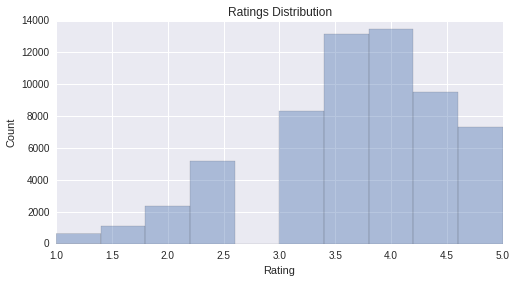

In [175]:
sns.set(rc={"figure.figsize": (8, 4)})

sns.distplot(business_df['stars'], kde=False, bins=10)

plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

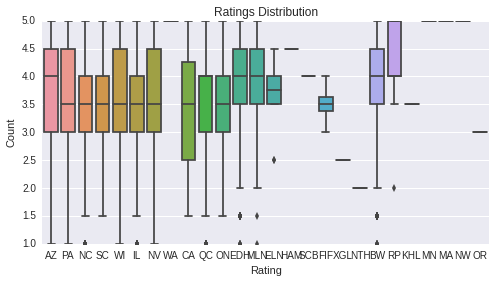

In [176]:
sns.set(rc={"figure.figsize": (8, 4)})

sns.boxplot(data=business_df, x='state', y='stars', orient='v')

plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()